In [1]:
#run in python 3.10.7 on windows

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


mtalbert = pd.read_csv('../Data/soil data/AcrossAucklandRainfallStation/MtAlbert_Data_15mins.csv' , parse_dates=['Timestamp (UTC+12:00)'])
mtalbert.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187529 entries, 0 to 187528
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Timestamp (UTC+12:00)  187529 non-null  datetime64[ns]
 1   Rain(mm)               187529 non-null  float64       
 2   SoilTemp(c)            187529 non-null  float64       
 3   SoilMoisture(%)        187529 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 5.7 MB


In [2]:
mtalbert.head()

,Timestamp (UTC+12:00),Rain(mm),SoilTemp(c),SoilMoisture(%)
0,2018-07-07 11:15:00,0.0,10.4,37.364
1,2018-07-07 11:30:00,0.0,10.4,37.594
2,2018-07-07 11:45:00,0.0,10.4,37.590
3,2018-07-07 12:00:00,0.0,10.5,37.587
4,2018-07-07 12:15:00,0.0,10.5,37.584


In [3]:
# Summary Statistics
print(mtalbert.describe())

               Timestamp (UTC+12:00)       Rain(mm)    SoilTemp(c)  \
count                         187529  187529.000000  187529.000000   
mean   2022-01-17 07:48:29.501997312       0.038837      17.079976   
min              2018-07-07 11:15:00       0.000000       9.400000   
25%              2020-09-13 19:00:00       0.000000      13.900000   
50%              2022-01-15 04:15:00       0.000000      16.700000   
75%              2023-05-21 10:15:00       0.000000      20.400000   
max              2024-10-21 20:00:00      14.000000      25.400000   
std                              NaN       0.273190       3.665015   

       SoilMoisture(%)  
count    187529.000000  
mean         43.446207  
min          34.323000  
25%          38.480000  
50%          44.229000  
75%          47.577000  
max          53.250000  
std           5.155842  


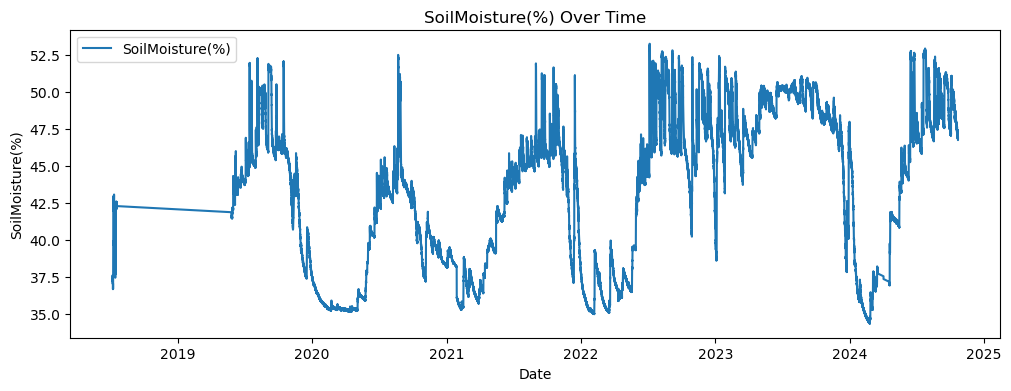

In [4]:
# Data Visualization

# Time series plot of rainfall
plt.figure(figsize=(12, 4))
plt.plot(mtalbert['Timestamp (UTC+12:00)'], mtalbert['SoilMoisture(%)'], label='SoilMoisture(%)')
plt.xlabel('Date')
plt.ylabel('SoilMoisture(%)')
plt.title('SoilMoisture(%) Over Time')
plt.legend()
plt.show()

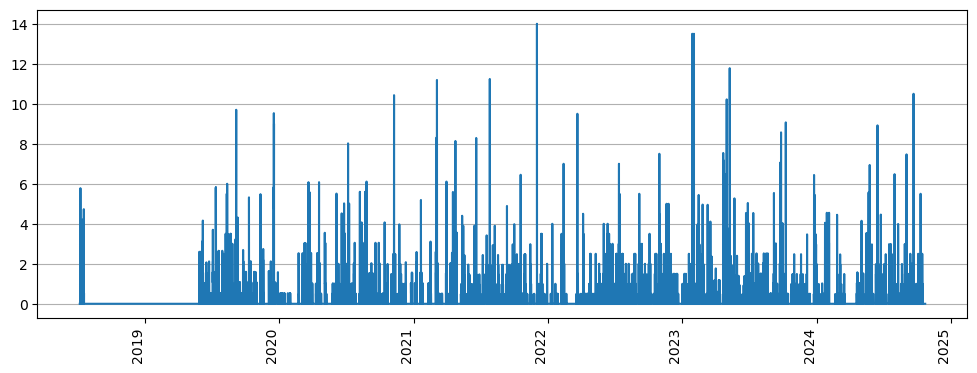

In [5]:
from matplotlib import dates
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(mtalbert['Timestamp (UTC+12:00)'], mtalbert['Rain(mm)'], label='Rainfall')
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter("%Y"))
ax.yaxis.grid(True)
# ax.xaxis.grid(True)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right")

plt.show()

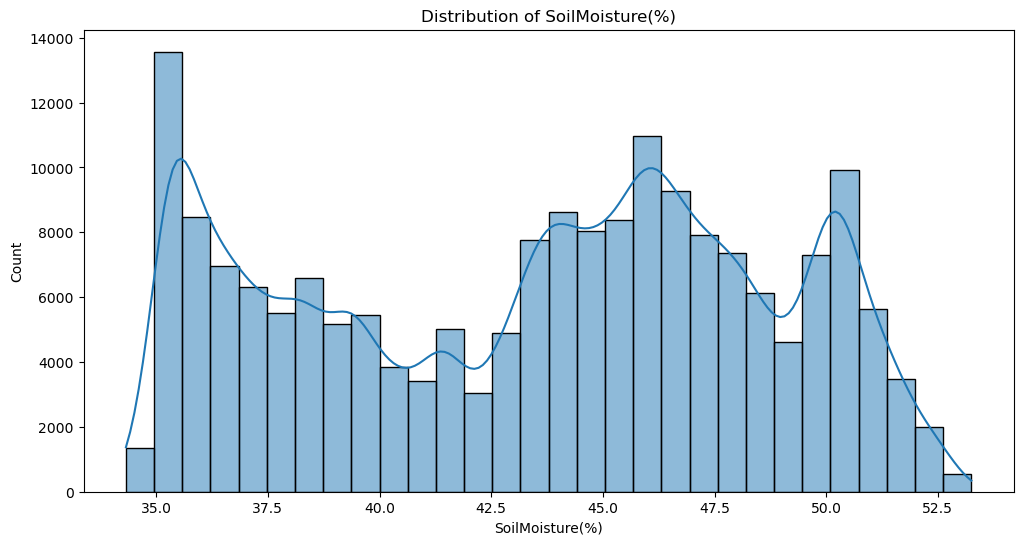

In [6]:
# Histograms
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data=mtalbert, x='SoilMoisture(%)', bins=30, kde=True)
plt.xlabel('SoilMoisture(%)')
plt.title('Distribution of SoilMoisture(%)')
plt.show()

In [7]:
mtalbert.columns

Index(['Timestamp (UTC+12:00)', 'Rain(mm)', 'SoilTemp(c)', 'SoilMoisture(%)'], dtype='object')

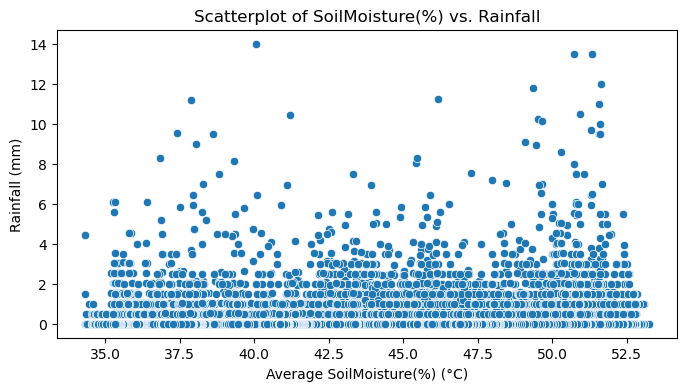

In [8]:
# Scatterplot
plt.figure(figsize=(8, 4))
sns.scatterplot(data=mtalbert, x='SoilMoisture(%)', y='Rain(mm)')
plt.xlabel('Average SoilMoisture(%) (°C)')
plt.ylabel('Rainfall (mm)')
plt.title('Scatterplot of SoilMoisture(%) vs. Rainfall')
plt.show()

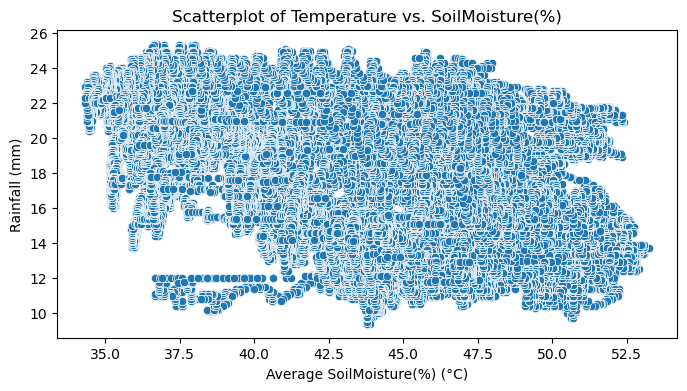

In [9]:
# Scatterplot
plt.figure(figsize=(8, 4))
sns.scatterplot(data=mtalbert, x='SoilMoisture(%)', y='SoilTemp(c)')
plt.xlabel('Average SoilMoisture(%) (°C)')
plt.ylabel('Rainfall (mm)')
plt.title('Scatterplot of Temperature vs. SoilMoisture(%)')
plt.show()

In [10]:
# Handling Missing Data
missing_data = mtalbert.isnull().sum()
print(missing_data)

Timestamp (UTC+12:00)    0
Rain(mm)                 0
SoilTemp(c)              0
SoilMoisture(%)          0
dtype: int64


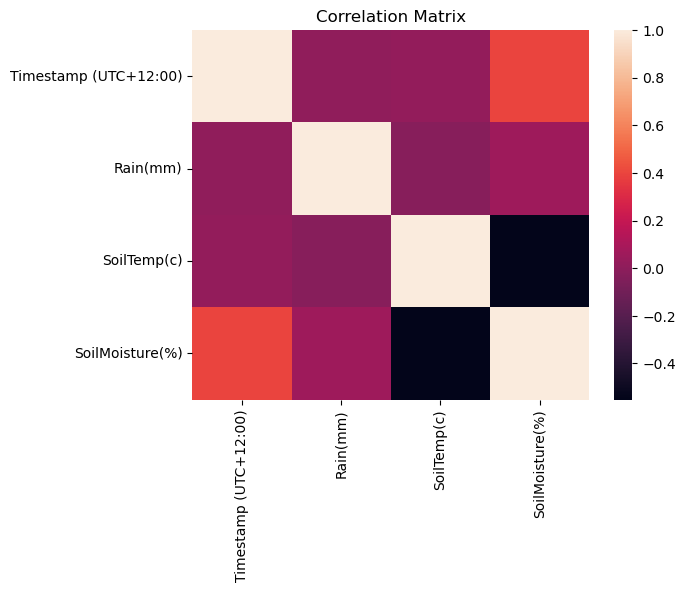

In [11]:
# Correlation Analysis
correlation_matrix = mtalbert.corr()
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix')
plt.show()

In [12]:
mtalbert.set_index('Timestamp (UTC+12:00)', inplace=True)

resampled_df = mtalbert.resample('H').agg({
    'Rain(mm)': 'sum',
    'SoilTemp(c)': 'mean',
    'SoilMoisture(%)': 'mean'
})

C:\Users\Ying\AppData\Local\Temp\ipykernel_19096\2774863814.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_df = mtalbert.resample('H').agg({


In [13]:
mtalbert_daily = mtalbert.resample('D').agg({'Rain(mm)': 'sum','SoilTemp(c)': 'mean','SoilMoisture(%)': 'mean'})

In [14]:
soil_moisture = mtalbert_daily['SoilMoisture(%)'].values
rainfall = mtalbert_daily['Rain(mm)'].values
soil_temp = mtalbert_daily['SoilTemp(c)'].values

In [15]:
# Calculate 7-day rolling average for Rain(mm), SoilTemp(c), and SoilMoisture(%)
mtalbert_daily['Rain_7d_avg'] = mtalbert_daily['Rain(mm)'].rolling(window=7, min_periods=1).sum()
mtalbert_daily['SoilTemp_7d_avg'] = mtalbert_daily['SoilTemp(c)'].rolling(window=7, min_periods=1).mean()

# Calculate 30-day rolling average for the same columns
mtalbert_daily['Rain_30d_avg'] = mtalbert_daily['Rain(mm)'].rolling(window=30, min_periods=1).sum()
mtalbert_daily['SoilTemp_30d_avg'] = mtalbert_daily['SoilTemp(c)'].rolling(window=30, min_periods=1).mean()
mtalbert_daily['SoilMoisture_30d_avg'] = mtalbert_daily['SoilMoisture(%)'].rolling(window=30, min_periods=1).mean()
mtalbert_daily.head()


,Rain(mm),SoilTemp(c),SoilMoisture(%),Rain_7d_avg,SoilTemp_7d_avg,Rain_30d_avg,SoilTemp_30d_avg,SoilMoisture_30d_avg
Timestamp (UTC+12:00),,,,,,,,
2018-07-07,0.00,11.064706,37.337412,0.00,11.064706,0.00,11.064706,37.337412
2018-07-08,7.36,11.355208,36.910969,7.36,11.209957,7.36,11.209957,37.124190
2018-07-09,19.99,12.148958,40.972479,27.35,11.522958,27.35,11.522958,38.406953
2018-07-10,7.88,11.923958,42.747948,35.23,11.623208,35.23,11.623208,39.492202
2018-07-11,0.53,11.422581,42.727272,35.76,11.583082,35.76,11.583082,40.139216


In [16]:
rainfall_lags = [1,3,7, 14, 21, 30,45, 60]  
soil_temp_lags = [1, 3, 7, 14] 

for i in rainfall_lags:
    mtalbert[f'Rainfall_lag_{i}'] = mtalbert['Rain(mm)'].shift(i)

for i in soil_temp_lags:
    mtalbert[f'SoilTemp_lag_{i}'] = mtalbert['SoilTemp(c)'].shift(i)

# Drop rows with NaN values in the lag features
mtalbert.dropna(inplace=True)
mtalbert.head(10)

,Rain(mm),SoilTemp(c),SoilMoisture(%),Rainfall_lag_1,Rainfall_lag_3,Rainfall_lag_7,Rainfall_lag_14,Rainfall_lag_21,Rainfall_lag_30,Rainfall_lag_45,Rainfall_lag_60,SoilTemp_lag_1,SoilTemp_lag_3,SoilTemp_lag_7,SoilTemp_lag_14
Timestamp (UTC+12:00),,,,,,,,,,,,,,,
2018-07-08 02:15:00,0.0,11.2,37.163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.2,11.2,11.2,11.4
2018-07-08 02:30:00,0.0,11.1,37.163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.2,11.2,11.2,11.4
2018-07-08 02:45:00,0.0,11.1,37.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1,11.2,11.2,11.4
2018-07-08 03:00:00,0.0,11.1,37.005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1,11.2,11.2,11.4
2018-07-08 03:15:00,0.0,11.1,37.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1,11.1,11.2,11.4
2018-07-08 03:30:00,0.0,11.1,37.005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1,11.1,11.2,11.2
2018-07-08 03:45:00,0.0,11.1,37.160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1,11.1,11.2,11.4
2018-07-08 04:00:00,0.0,11.1,37.157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1,11.1,11.2,11.2
2018-07-08 04:15:00,0.0,11.1,37.157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1,11.1,11.1,11.2


In [17]:
mtalbert.columns

Index(['Rain(mm)', 'SoilTemp(c)', 'SoilMoisture(%)', 'Rainfall_lag_1',
       'Rainfall_lag_3', 'Rainfall_lag_7', 'Rainfall_lag_14',
       'Rainfall_lag_21', 'Rainfall_lag_30', 'Rainfall_lag_45',
       'Rainfall_lag_60', 'SoilTemp_lag_1', 'SoilTemp_lag_3', 'SoilTemp_lag_7',
       'SoilTemp_lag_14'],
      dtype='object')

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = mtalbert[['Rain(mm)', 'SoilTemp(c)',  'Rainfall_lag_1', 'Rainfall_lag_3', 'Rainfall_lag_7', 'Rainfall_lag_14',
       'Rainfall_lag_21', 'Rainfall_lag_30', 'Rainfall_lag_45',
       'Rainfall_lag_60', 'SoilTemp_lag_1', 'SoilTemp_lag_3', 'SoilTemp_lag_7',
       'SoilTemp_lag_14']]

y = mtalbert[['SoilMoisture(%)']]

X.dropna(inplace=True)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (187469, 14)
y shape: (187469, 1)


C:\Users\Ying\AppData\Local\Temp\ipykernel_19096\2055559925.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


# XGBoost Model

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_rmse = sqrt(mean_squared_error(y_test, xgb_predictions))
print(f'XGBoost RMSE: {xgb_rmse}')

XGBoost RMSE: 3.7282099649619567


In [21]:
# Predict rainfall for tomorrow using the XGBoost model
xgb_predict_tomorrow = xgb_model.predict(X_train)
xgb_predict_day_after_tomorrow = xgb_model.predict(X_train)
xgb_predict_two_days_after_tomorrow = xgb_model.predict(X_train)

# Print the predictions
print(f'Random Forest Prediction for tomorrow: {xgb_predict_tomorrow[0]} mm')
print(f'Random Forest Prediction for the day after tomorrow: {xgb_predict_day_after_tomorrow[0]} mm')
print(f'Random Forest Prediction for two days after tomorrow: {xgb_predict_day_after_tomorrow[0]} mm')

Random Forest Prediction for tomorrow: 40.49073028564453 mm
Random Forest Prediction for the day after tomorrow: 40.49073028564453 mm
Random Forest Prediction for two days after tomorrow: 40.49073028564453 mm


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

def evaluate_model(predictions, y_test):
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = sqrt(mse)
    r2 = r2_score(y_test, predictions)

    return mae, mse, rmse, r2

rf_mae, rf_mse, rf_rmse, rf_r2 = evaluate_model(xgb_predictions, y_test)

print("\nXGBoost Testing Set Metrics:")
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"R2 Score: {rf_r2}")


XGBoost Testing Set Metrics:
MAE: 3.0243609665715563
MSE: 13.899549542841633
RMSE: 3.7282099649619567
R2 Score: 0.47726830458122427


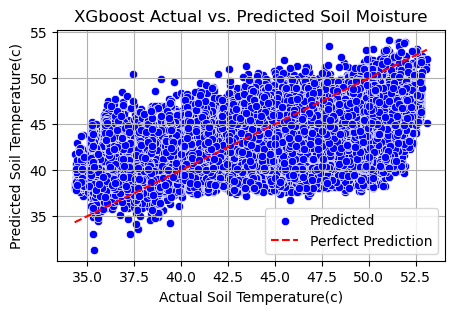

In [23]:
y_test_df = pd.DataFrame(y_test.reset_index(drop=True), columns=['SoilMoisture(%)'])
predictions_df = pd.DataFrame(xgb_predictions, columns=['Predicted'])

results_df = pd.concat([y_test_df, predictions_df], axis=1)

plt.figure(figsize=(5, 3))
sns.scatterplot(x=results_df['SoilMoisture(%)'], y=results_df['Predicted'], color='blue', label='Predicted')
plt.plot([results_df['SoilMoisture(%)'].min(), results_df['SoilMoisture(%)'].max()], 
         [results_df['SoilMoisture(%)'].min(), results_df['SoilMoisture(%)'].max()], 
         color='red', linestyle='--', label='Perfect Prediction')
plt.title('XGboost Actual vs. Predicted Soil Moisture')
plt.xlabel('Actual Soil Temperature(c)')
plt.ylabel('Predicted Soil Temperature(c)')
plt.legend()
plt.grid()
plt.show()